# Map of correlations

In [68]:
import xarray as xr
from pathlib import Path

import intake
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import os

In [69]:
#calculate evapotranspiration 
icon_evap = (ds_jja['hflsd']*86400 )/2.45e6

In [70]:
icon_pr = ds['pr'].mean('time')* 86400

In [71]:
icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.1), icon_evap, np.NaN)

icon_corr_evap_pr      = xr.where((icon_pr>=.1)&( ds_jja['sftlf'] >0.1), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.NaN) #.values

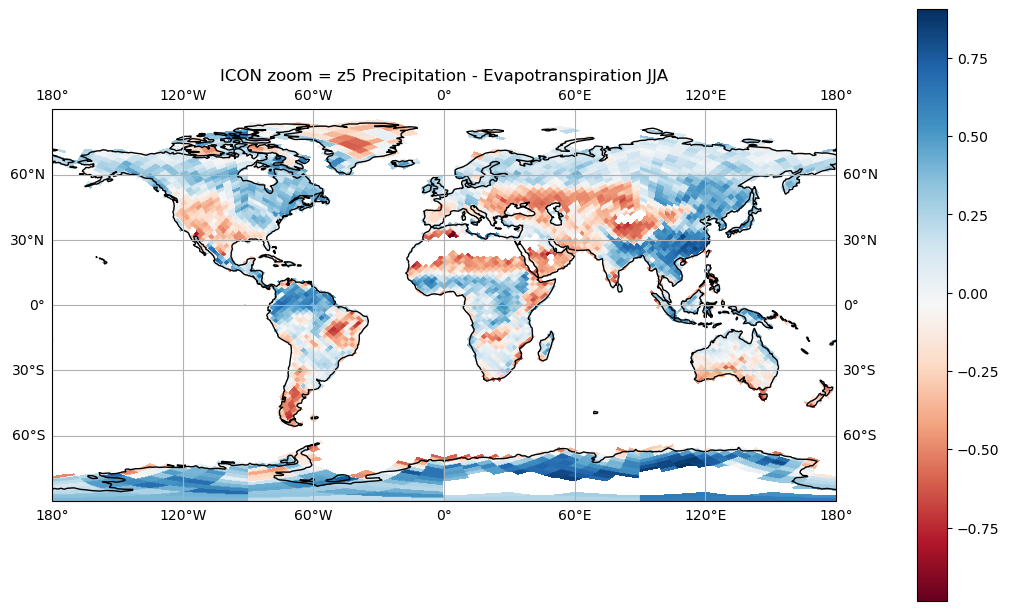

In [73]:
# correlation map of precipitation and evapotranspiration

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_evap_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()